In [1]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 22.0 MB/s eta 0:00:00


In [6]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow


image 1/1 /content/cars.jpg: 256x640 21 cars, 3 trucks, 191.6ms
Speed: 2.9ms preprocess, 191.6ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 640)


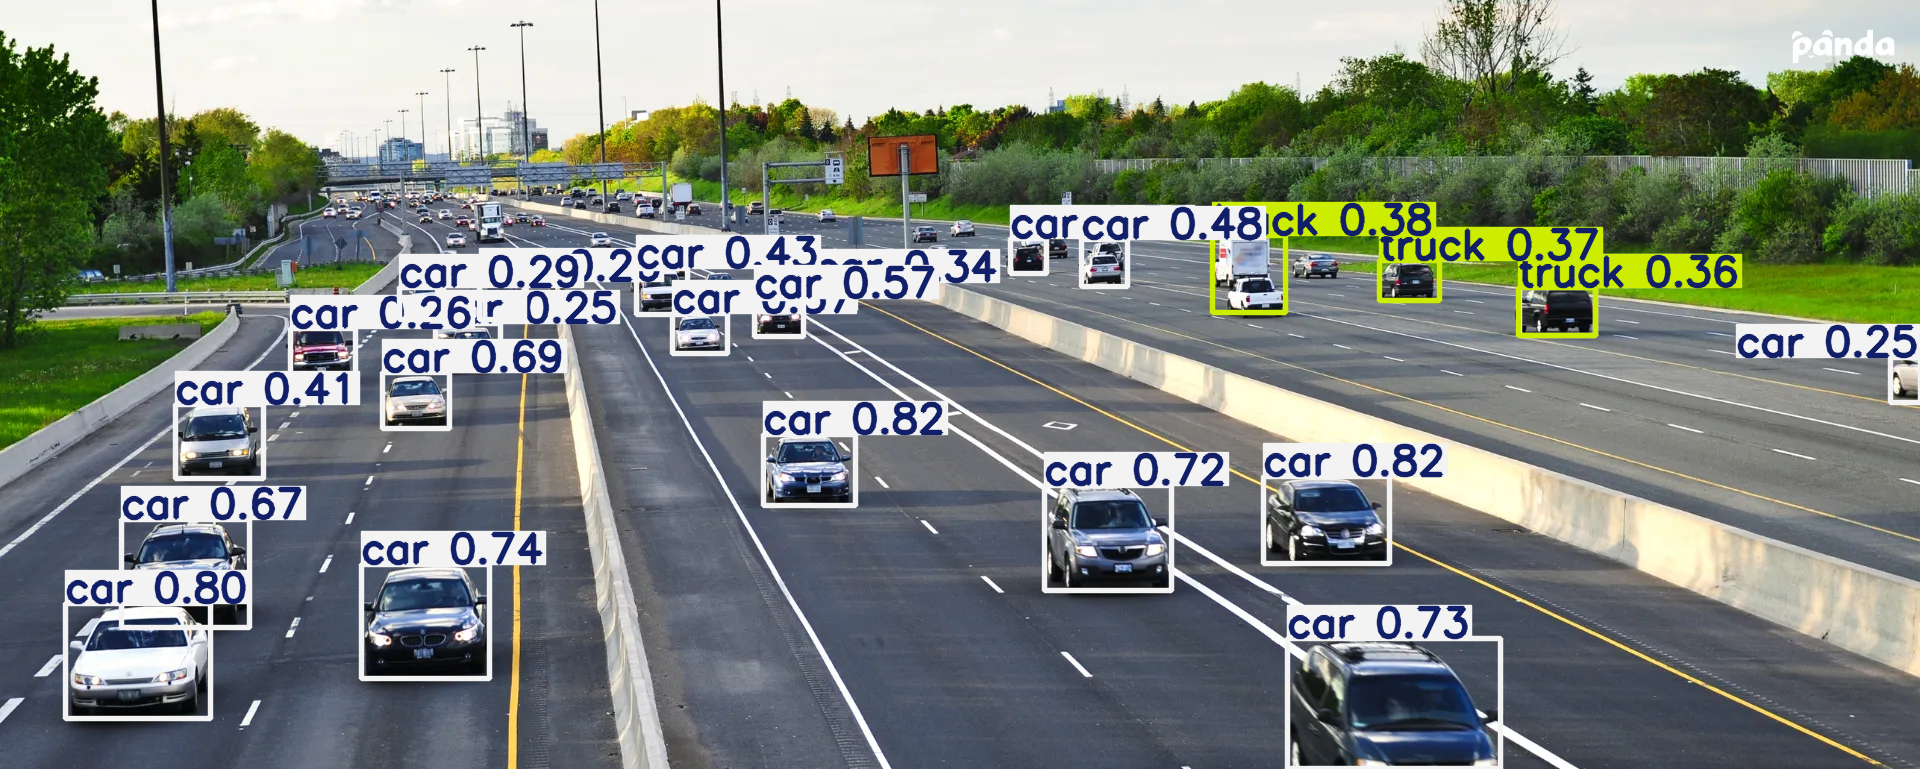

In [7]:
# Load the pretrained YOLOv8 model
model = YOLO("yolov8n.pt")  # Use a pretrained YOLOv8 Nano model

# Load an image
image_path = "/content/cars.jpg"  # Replace with your image path
output_path = "/content/carOUT.jpg"    # Path to save the output image

# Perform object detection
results = model(image_path)

# Draw bounding boxes on the image
annotated_image = results[0].plot()  # Automatically draws bounding boxes and labels

# Save the image with bounding boxes
cv2.imwrite(output_path, annotated_image)

# Display the result in Colab
cv2_imshow(annotated_image)  # Use cv2_imshow instead of cv2.imshow


In [9]:
path = "/content/carsVideo.mp4"
results = model(source=path,conf=0.4)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/750) /content/carsVideo.mp4: 384x640 1 person, 2 cars, 181.5ms
video 1/1 (frame 2/750) /content/carsVideo.mp4: 384x640 1 person, 2 cars, 149.3ms
video 1/1 (frame 3/750) /content/carsVideo.mp4: 384x640 1 person, 2 cars, 143.6ms
video 1/1 (frame 4/750) /content/carsVideo.mp4: 384x640 1 person, 2 cars, 144.9ms
video 1/1 (frame 5/750) /content/carsVideo.mp4: 384x640 1 person, 2 cars, 153.0ms
video 1/1 (frame 6/750) /content/carsVideo.mp4

In [10]:
frames = []


for frame in results:
    frames.append(frame.plot())

In [14]:
import cv2


first_image = frames[0]


frame_size = (first_image.shape[1], first_image.shape[0])


output_filename = '/content/CarOutput_video.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = 24

out = cv2.VideoWriter(output_filename, fourcc, fps, frame_size)

for frame in frames:
    out.write(frame)

out.release()
print("Video created successfully.")

Video created successfully.
